# Minor Project on Students performance analysis by HEMANTH BANDI


## Objective : 
To understand how the student's performance (test scores) is affected by the other variables (Gender, Ethnicity,                 Parental level of education, Lunch, Test preparation course). 

## To analyse the insights in the dataset, we will look at the features :

* Gender                : Gender of the student 
* Ethnicity             : Race of the Student As Group A/B/C/D/E 
* Parental_education    : What is the educational qualification of Students Parent
* Lunch                 : Whether the lunch is Standard type/Free lunch or Some discounted lunch
* Course                : Whether Student has Taken or not and Completed
* Math                  : Scores in Maths
* Reading               : Scores in Reading
* Writing               : Scores in Writing
* Average               : Average score of 3 subjects

## Strategy :

1. Building an Average Score column
2. Analysis of the average score based on other variables/features
3. Gender factor based on individual subjects score
4. Whether lunch affects the scores
5. Taking a test preparation course whether affects the final average.

### Import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [101]:
students = pd.read_csv('StudentsPerformance.csv')

In [109]:
students.head(10)

,Gender,Ethnicity,Parental_education,Lunch,Course,Math,Reading,Writing,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
5,female,group B,associate's degree,standard,none,71,83,78,77.33
6,female,group B,some college,standard,completed,88,95,92,91.67
7,male,group B,some college,free/reduced,none,40,43,39,40.67
8,male,group D,high school,free/reduced,completed,64,64,67,65.00
9,female,group B,high school,free/reduced,none,38,60,50,49.33


#### Creating a new column 'Average' that is the mean of all the subject scores :

In [106]:
students['Average'] = round(((students['Math'] + students['Reading'] + students['Writing'])/3),2)

In [25]:
students.Parental_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [16]:
students.columns.tolist()

['Gender',
 'Ethnicity',
 'Parental_education',
 'Lunch',
 'Course',
 'Math',
 'Reading',
 'Writing']

In [108]:
students.columns = ['Gender','Ethnicity','Parental_education','Lunch','Course','Math','Reading','Writing','Average']

In [5]:
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### To check missing values :

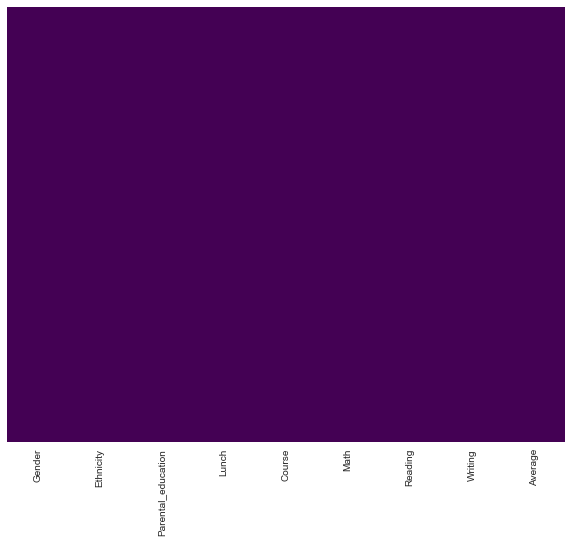

In [112]:
plt.figure(figsize=(10, 8))
sns.heatmap(students.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### There are no missing values.

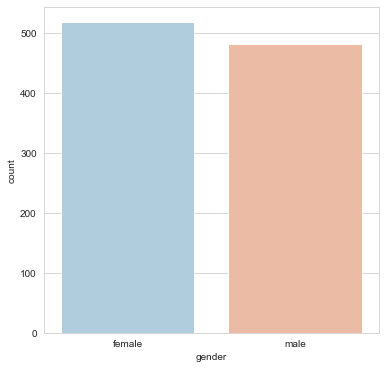

In [8]:
plt.figure(figsize=(6, 6))
sns.set_style('whitegrid')
sns.countplot(x='gender',data=students,palette='RdBu_r')

#### The gender ratio is balanced. And we wouldn't get any bias based on gender.

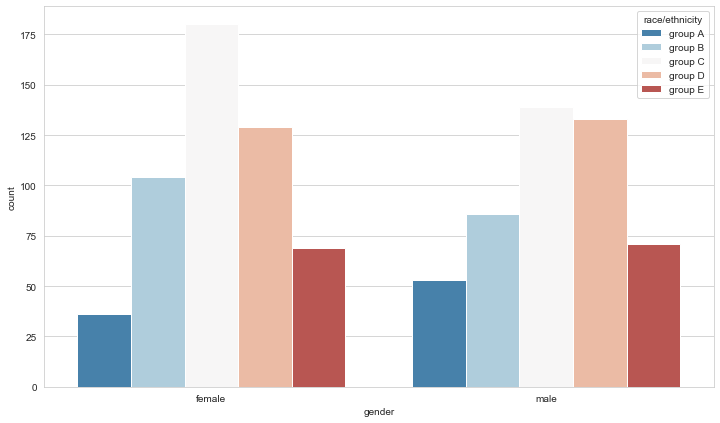

In [9]:
plt.figure(figsize=(12, 7))

sns.countplot(x='gender',
              hue='race/ethnicity',
              hue_order=["group A","group B","group C","group D","group E"],
             #order=["male","female"],
              data=students,
              palette='RdBu_r')

#### Race of Group C has the highest number of students, followed by D, B, E, and A.

<Figure size 864x504 with 0 Axes>

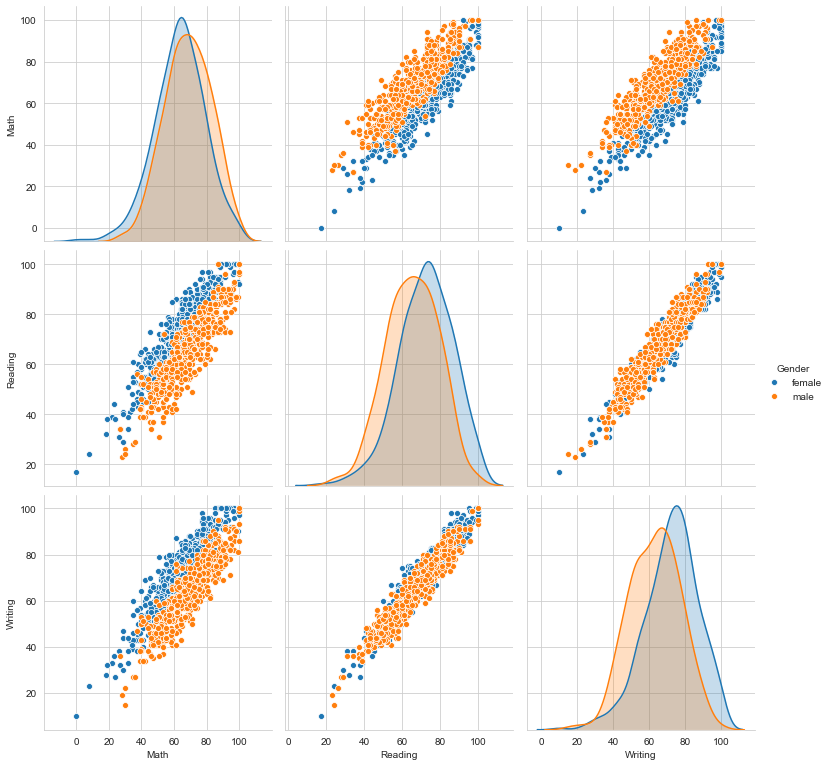

In [35]:
plt.figure(figsize=(12, 7))

sns.pairplot(students,hue="Gender",height=3.5)

### Pairplot gives us the info that the values are highly correlated if not perfect. Because the tighter the points, the better the correlation, and the distribution of points along the line of best fit. We can easily see that while Males tend to score better in Math, Females score better than them in Reading and Writing.

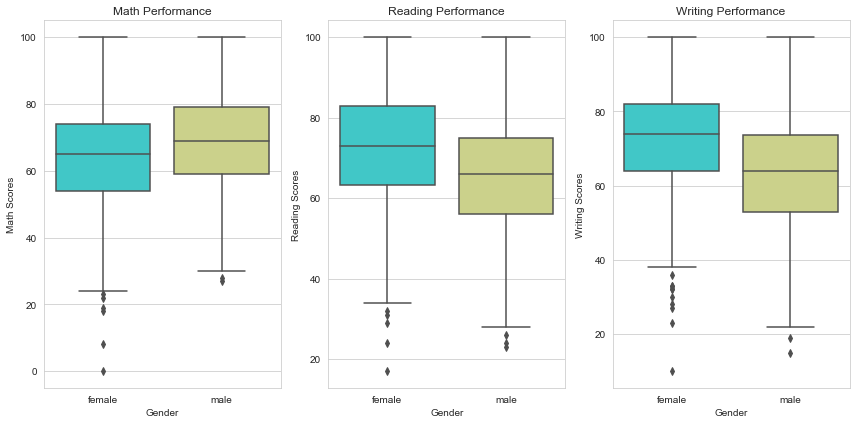

In [69]:
fig , axes = plt.subplots (1,3, figsize=(12,6))

vis1 = sns.boxplot(x="Gender", y="Math", data=students, palette='rainbow', ax=axes[0])

vis2 = sns.boxplot(x="Gender", y="Reading", data=students, palette='rainbow', ax=axes[1])

vis3 = sns.boxplot(x="Gender", y="Writing", data=students, palette='rainbow', ax=axes[2])

vis1.set(ylabel='Math Scores')
vis2.set(ylabel='Reading Scores')
vis3.set(ylabel='Writing Scores')

axes[0].set_title('Math Performance')
axes[1].set_title('Reading Performance')
axes[2].set_title('Writing Performance')

plt.tight_layout()

plt.show()

### The above box plot provides insights based on gender. As we previously said, Males are better in Math and Females are good at Reading and Writing.

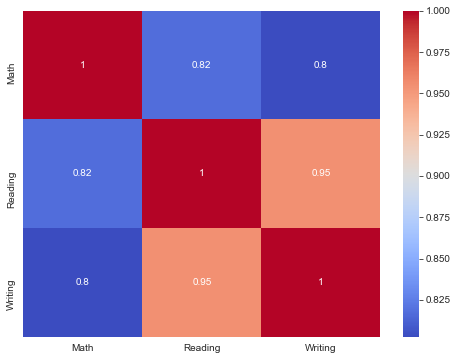

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(students.corr(),cmap='coolwarm',annot=True)

#### This heatmap provides us the info that Writing and Reading are highly correlated with each other. This signifies positive correlation, meaning that there is an increase in level of one variable after increase in level of another variable. So we can clearly see that students who perform well in Reading tend to perform well in Writing as well (0.95) , while students who perform good at math generally don't perform well in either Writing (0.8) or Reading (0.82) and vice versa.

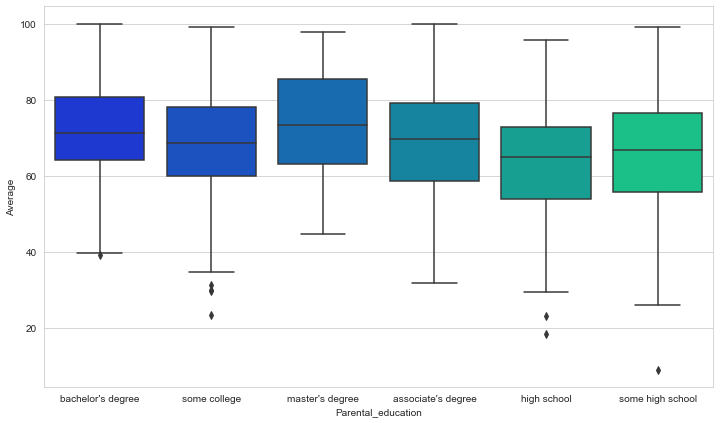

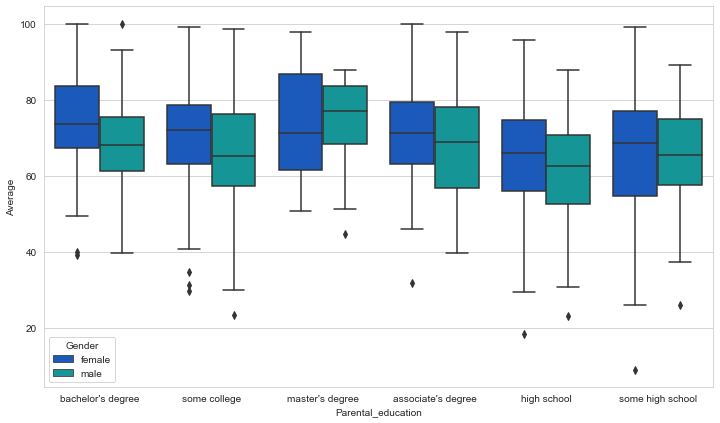

In [116]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Parental_education',y='Average',data=students,palette='winter')

plt.figure(figsize=(12, 7))
sns.boxplot(x='Parental_education',y='Average',hue='Gender',data=students,palette='winter')

### The above multiple boxplots provies info as how a parents educational level affects that of a students. We can draw insights such as, A parent who has a Masters degree or Bachelors degree can surely expect his/her son or daughter to score better, while a parent having a lower educational qualification such as high school, usually their children have lower scores. But one interesting insight we can observe here is Sons of a master degree holder have the highest performance, while the daughters do not study well. Strange..!!

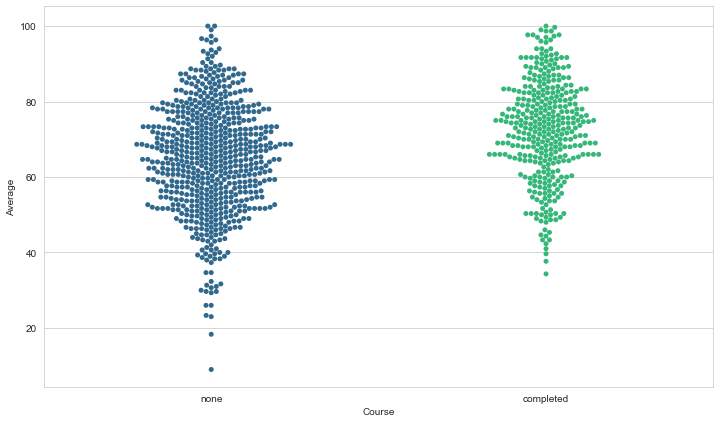

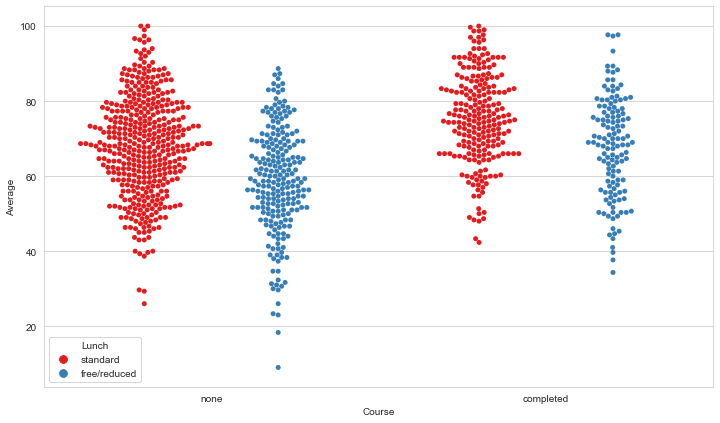

In [123]:
plt.figure(figsize=(12, 7))
sns.swarmplot(x="Course", y="Average",data=students, palette="viridis", split=True)

plt.figure(figsize=(12, 7))
sns.swarmplot(x="Course", y="Average",hue='Lunch',data=students, palette="Set1", split=True)

### This swarmplot gives us info as to how a test preparation course helps a student in his final results. We can see, that those who take up a test preparation course and complete it, score better than those who did not. And also it's interesting to notice that students who eat standard lunch instead of free or discounted lunch at their school, have a higher performance factor.

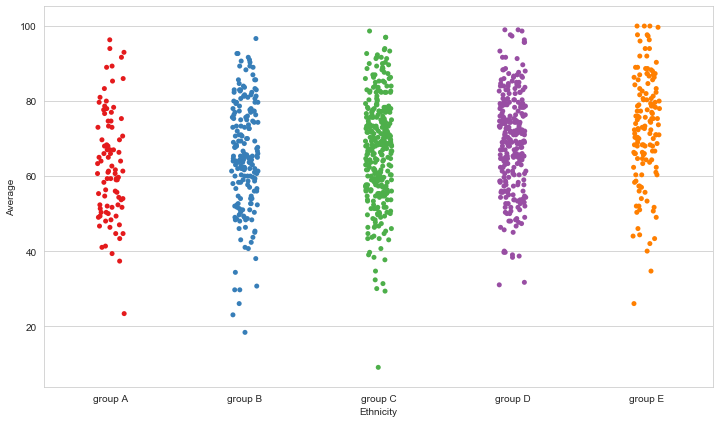

In [130]:
plt.figure(figsize=(12, 7))
sns.stripplot(x="Ethnicity", y="Average",order= ["group A","group B","group C","group D","group E"],
              data=students, jitter = True, palette="Set1")

### Finally a swarm plot to analyse the Race of a student and his performance. Although we have seen previously that group C had highest no of students, group E and D students perform well.

## Inference made :

* Boys are good at Math and Girls are good at Reading and Writing
* If a student has to improve his reading or writing scores, if he focuses on one, automatically he will score well in the other
* Parents educational qualification is very important, because an highly educated parent can teach his/her child and help him score better
* Making the standard lunch as a choice for the student may have an phychological impact on a student rather than a student feeling that he or she is having free or discounted lunch
* Taking a test preparation course before tests is very much recommended for a student to make his/her scores better
* Ethnicity or Race should not be seen as a factor for the intelligence of a student, as the performance is not so deviating in terms of Race groups.